# Disease prediction

## 2.0 - EDA uppvärmning


In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [3]:
Cardio = pd.read_csv('Data/cardio_train.csv', sep=';') #delete semicolon using 'sep' based on:https://www.geeksforgeeks.org/python-sep-parameter-print/
Cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


- a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [7]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
cardio_count= Cardio.cardio.value_counts()
print(f'Number of positive cases for cardiovascular disease : {cardio_count[1]}')
print(f'Number of negative cases for cardiovascular disease : {cardio_count[0]}')

Number of positive cases for cardiovascular disease : 34979
Number of negative cases for cardiovascular disease : 35021


- b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [14]:
Cardio["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

Text(0.5, 1.0, 'kolesterolvärde')

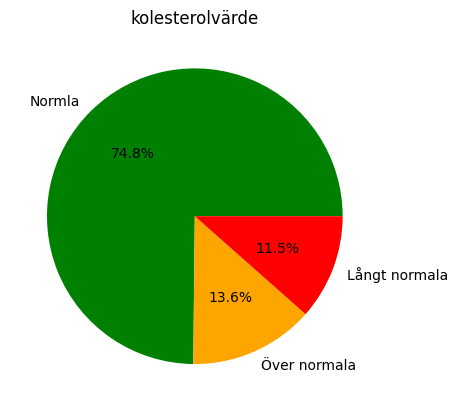

In [18]:
plt.pie(Cardio['cholesterol'].value_counts(), labels=["Normla", "Över normala", "Långt normala"], autopct="%1.1f%%", colors=["green", "orange", "red"])
plt.title('kolesterolvärde')

- c) Hur ser åldersfördelningen ut? Rita ett histogram.


<AxesSubplot:xlabel='Age', ylabel='Count'>

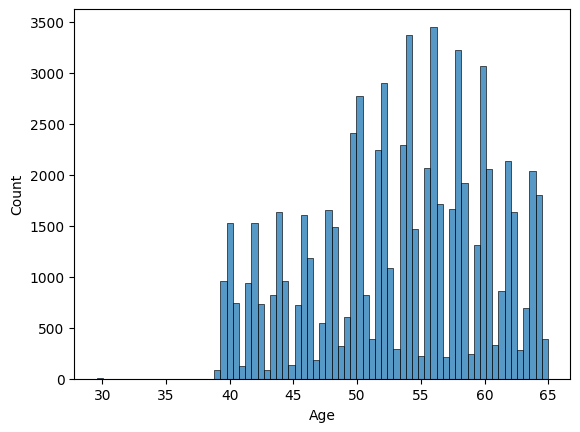

In [27]:
# age column is given in days so I need to convert it in years using pd
Age= pd.DataFrame({"Age": Cardio["age"]/365})
sns.histplot(Age["Age"])

- d) Hur stor andel röker?

In [29]:
Smokers= (Cardio["smoke"].value_counts()[1])
Smokers

6169

In [33]:
#get percentage
Smokers_andel=(Smokers/Cardio["smoke"].count())*100
print(f'Smokers are {Smokers_andel} % of the total.')

Smokers are 8.812857142857142 % of the total.


- e) Hur ser viktfördelningen ut? Rita lämpligt diagram.

Text(0.5, 1.0, 'Viktfördelningen')

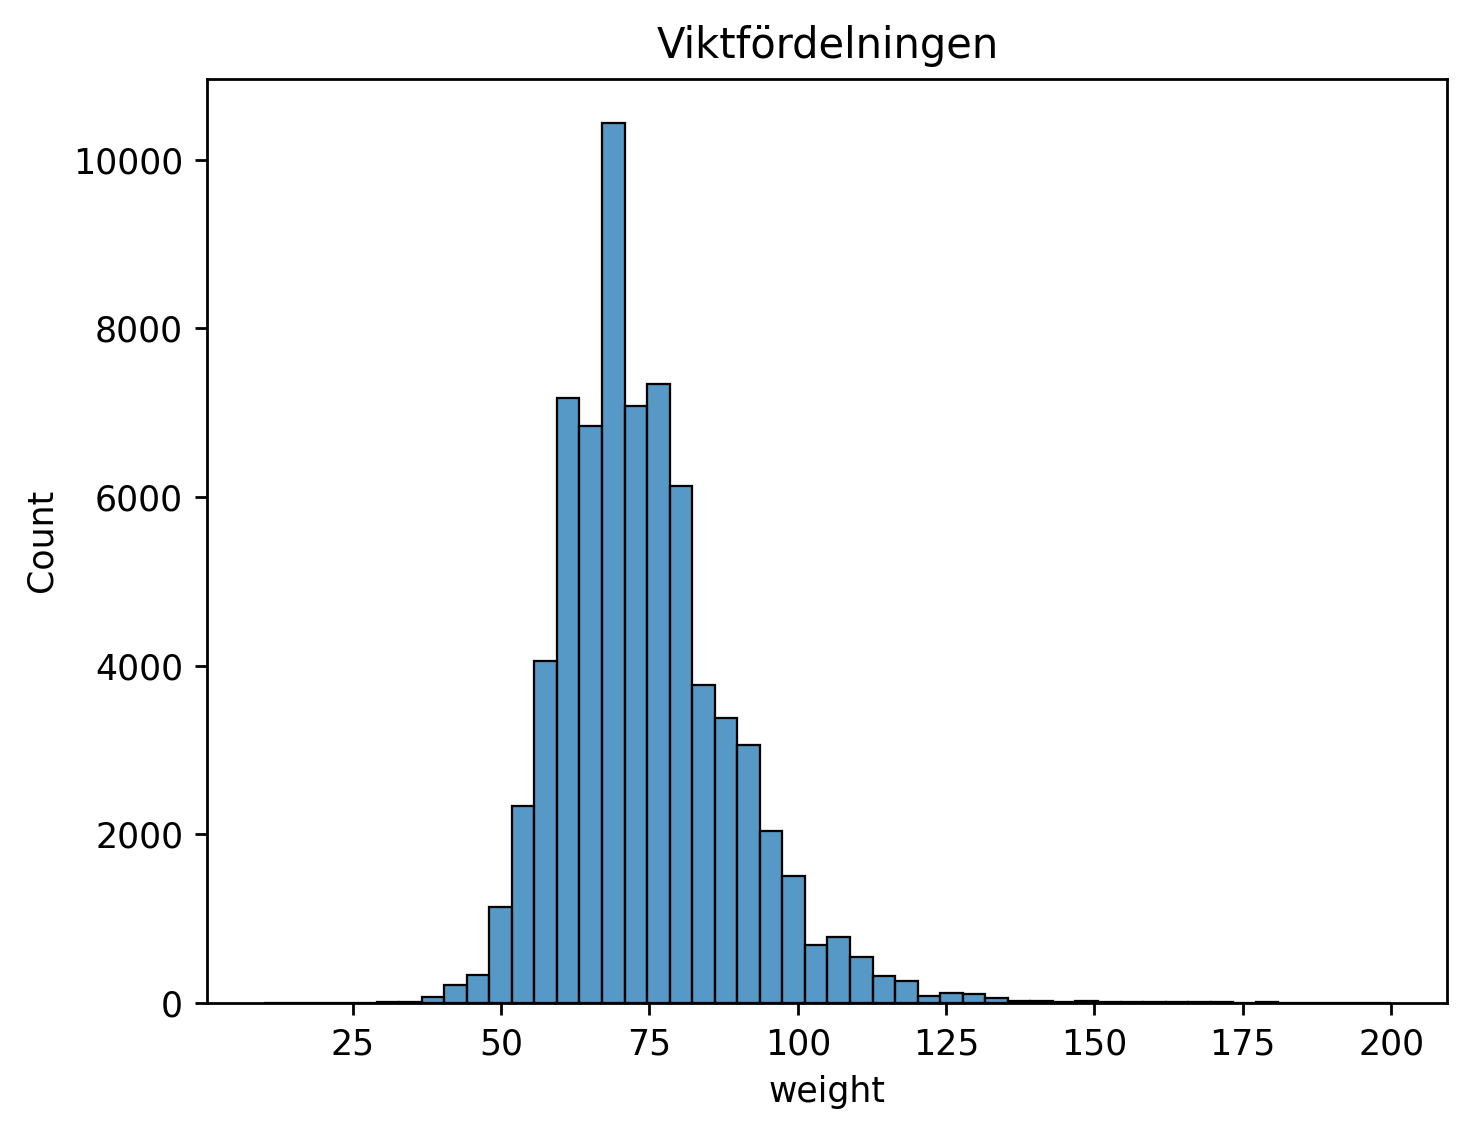

In [44]:
plt.figure(dpi=250)
sns.histplot(Cardio["weight"], bins=50)
plt.title("Viktfördelningen")


- f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

Text(0.5, 1.0, 'Längdfördelningen')

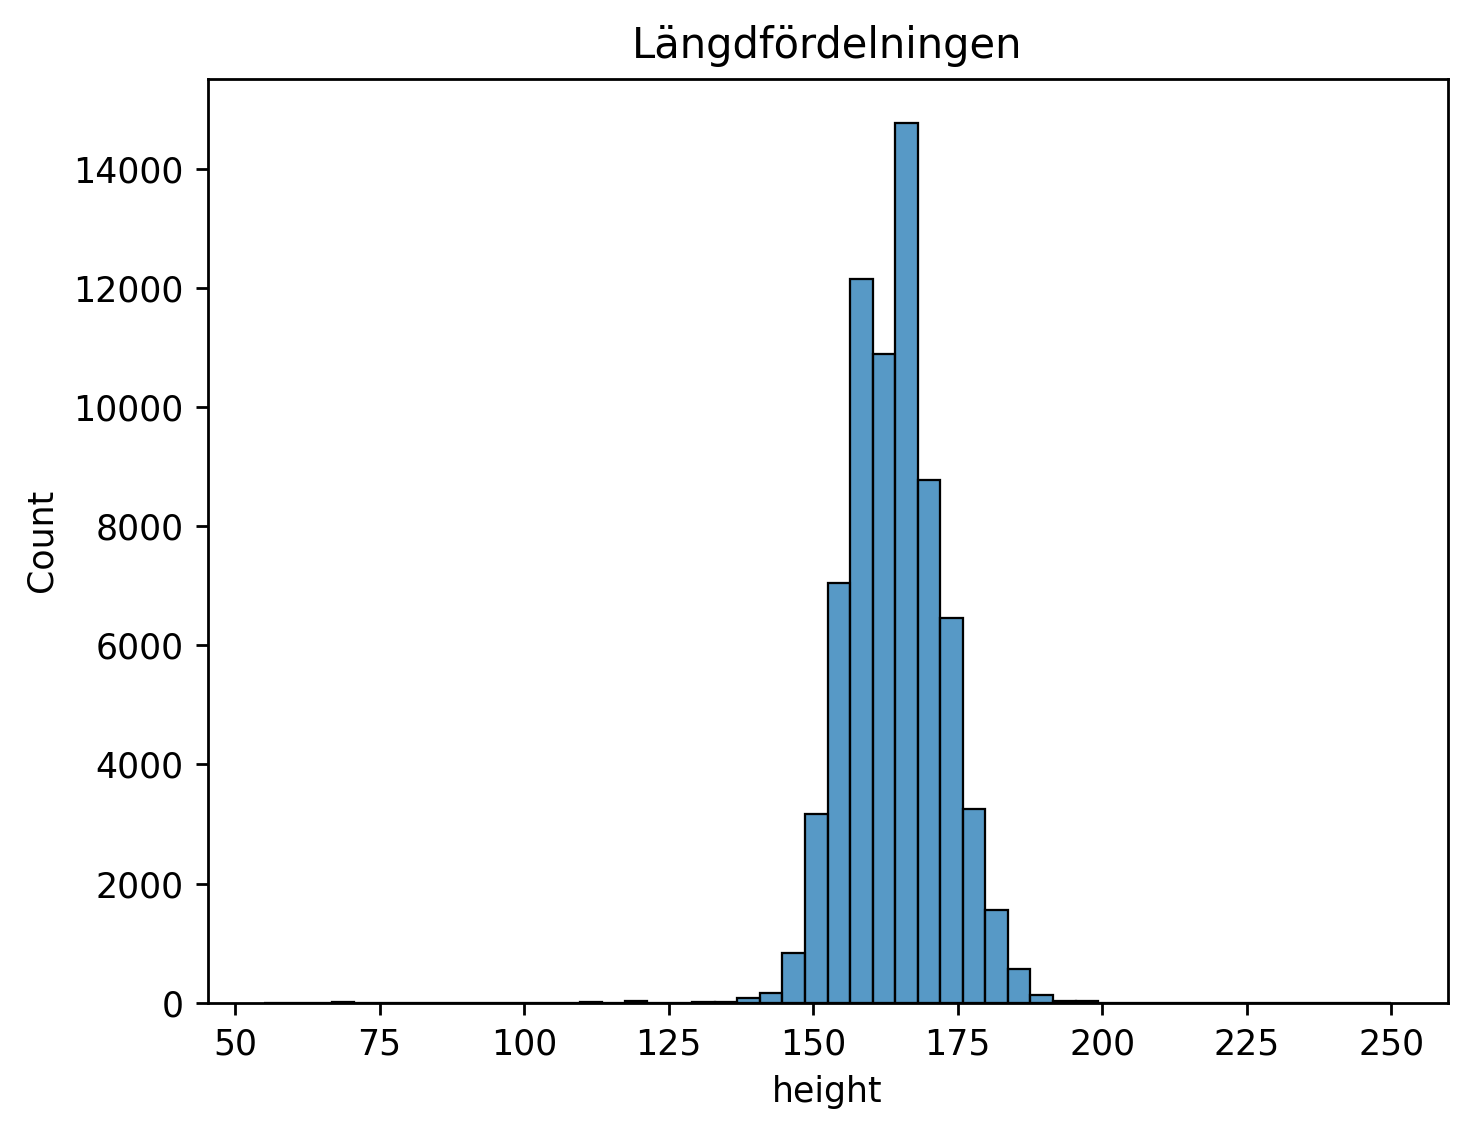

In [45]:
plt.figure(dpi=250)
sns.histplot(Cardio["height"], bins=50)
plt.title("Längdfördelningen")

- g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram


Text(0.5, 1.0, 'könfördelning')

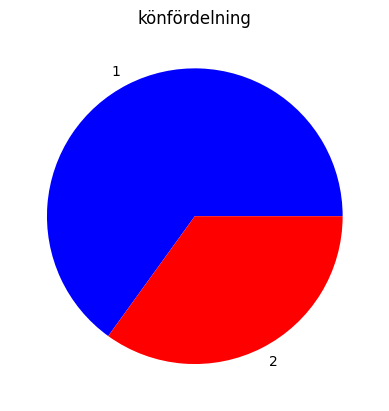

In [32]:
plt.pie(Cardio['gender'].value_counts(), labels=["1", "2"], colors=["blue", "red"])
plt.title('könfördelning')

# 2.1.0 - Feature engineering BMI

- a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv hur du gör avvägningen

In [4]:
#I started by calculating BMI
Cardio['BMI'] = Cardio['weight']/((Cardio['height']/100)**2)
Cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [6]:
Cardio['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

- As we can see there are some wrong values because 'min' is up to 3 which is very low and 'max' is up to 298 which is very high.
- I need to do an examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots. refrence:https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
- I will try the scatter plot:

<AxesSubplot:ylabel='BMI'>

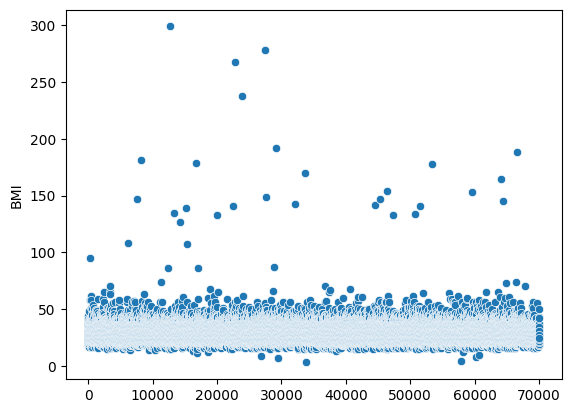

In [13]:
sns.scatterplot(data = Cardio['BMI'])

In [11]:
# Values analysis is based on categories existed in https://en.wikipedia.org/wiki/Body_mass_inde
#As we can see the data is skewed so some of them needs to be removed.
Cardio['BMI']= Cardio['BMI'].round(0) # the function will return the nearest integer.
Drop_low_values= Cardio.index[Cardio['BMI'] < 16].to_list()
Drop_high_values= Cardio.index[Cardio['BMI'] < 50].to_list()
Drop=Drop_low_values + Drop_high_values
Data_BMI=Cardio.drop(Drop)
Data_BMI=Cardio.reset_index(drop=True)
Data_BMI.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


- b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese(class II), obese (class III).

In [15]:
# Now i will set some conditions to categorize values
# create a list of our conditions
conditions = [
    (Cardio['BMI'] <= 18),
    (Cardio['BMI'] > 18) & (Cardio['BMI'] < 25),
    (Cardio['BMI'] >= 25) & (Cardio['BMI'] < 30),
    (Cardio['BMI'] >= 30) & (Cardio['BMI'] < 35),
    (Cardio['BMI'] >= 35) & (Cardio['BMI'] < 40),
    (Cardio['BMI'] > 40)
    ]

# create a list of the values we want to assign for each condition
values = ['Undeweight', 'Normal weight','Overweight', 'Obesity(Class 1)', 'Obesity(Class 2)', 'Obesity(Class 3)']

# create a new column and use np.select to assign values to it using our lists as arguments
Cardio['BMI Category'] = np.select(conditions, values)

# display updated DataFrame
Cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal weight
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obesity(Class 2)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal weight
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal weight


# 2.1.1 - Feature engineering blodtryck

In [17]:
Cardio['ap_hi'].describe

<bound method NDFrame.describe of 0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int64>

In [19]:
Cardio['ap_lo'].describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

<AxesSubplot:>

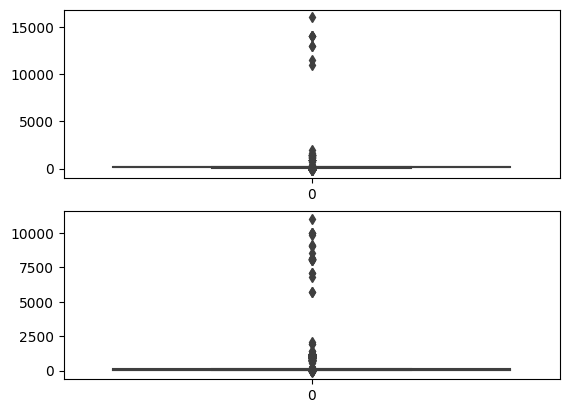

In [34]:
fig, axes = plt.subplots(2)
sns.boxplot(data = Cardio['ap_hi'], ax = axes[0])
sns.boxplot(data = Cardio['ap_lo'], ax = axes[1])